In [23]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load statistic package
from scipy import stats
import math
from pylab import * # untuk melihat hasil korelasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower



In [24]:
data = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

In [25]:
data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [27]:
data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [28]:
data.duplicated().sum()

0

In [29]:
data['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [30]:
clean_data = data[(data['yes']==1) & (data['no']==1)]

In [31]:
clean_data

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [37]:
std = data['hour'].std()

In [34]:
statistics.stdev(data['hour'])

5.734879372378906

In [26]:
treatment = clean_data[clean_data['experiment']=='exposed']
control = clean_data[clean_data['experiment']=='control']


ValueError: min() arg is an empty sequence

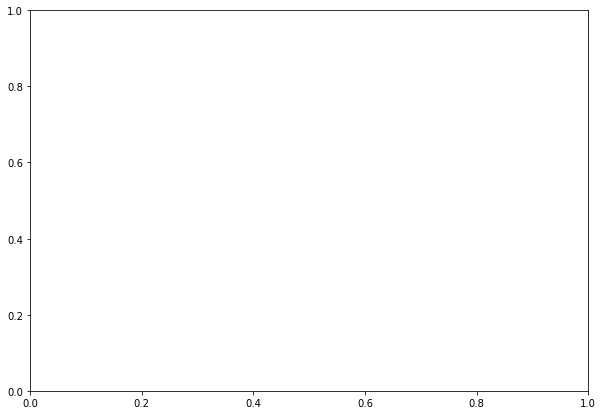

In [38]:
# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'experiment',
            y = 'hour',
            data = clean_data,
            ax = ax)

plt.show()

ValueError: min() arg is an empty sequence

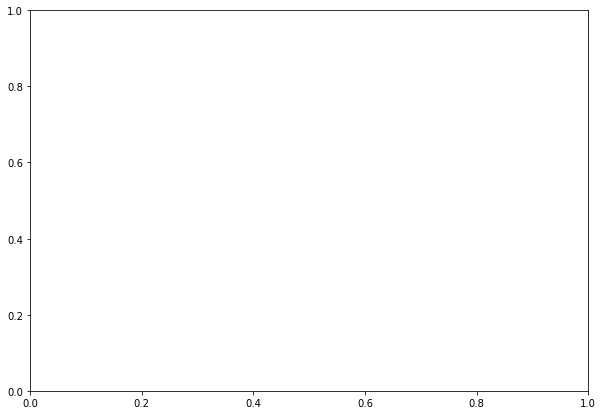

In [39]:
# make boxplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
sns.boxplot(x = 'yes',
            y = 'hour',
            data = clean_data,
            ax = ax)

plt.show()

In [40]:
# Given
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power
std_dev = std      # variance of population (assumed / approximated)
beta = 1 - power

In [41]:
# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [42]:
# calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 5162811.22


In [43]:
# Given
n = 1600          # assume that is the minimum sample size we use
delta = 0.01    
std_dev = 0.1
alpha = 0.05

In [44]:
# Calculate the z_alpha
z_alpha = stats.norm.ppf(1 - alpha/2)
z_alpha

1.959963984540054

In [45]:
# Calculate the z_beta
z_beta = np.sqrt((n * (delta**2))/(2 * std_dev**2)) - z_alpha
z_beta

0.8684631402061358

In [46]:
# using library stats.norm.sf(z_value)
beta = stats.norm.sf(z_beta)
print(f"beta          t  : {beta:.2f}")

# find power
power = 1 - beta
print(f"Power in 1 week : {power*100:.2f} %")

beta          t  : 0.19
Power in 1 week : 80.74 %


### Another method

In [60]:
# Given
n = 800          # assume that is the minimum sample size we use
delta = 0.01    
std_dev = std
alpha = 0.05

In [61]:
# parameters for power analysis
effect_size = delta/std_dev

# Initiate the power analysis
power_analysis = TTestIndPower()

# Calculate power
power = power_analysis.power(effect_size = effect_size, 
                             alpha = alpha, 
                             nobs1 = n, 
                             ratio = 1)

# Print results
print(f"Power in 1 week : {power*100:.2f} %")

Power in 1 week : 5.01 %


In [62]:
# calculate standar deviation

#given 
p=0.02

std_dev = np.sqrt(p*(1-p))
std_dev

0.13999999999999999

In [63]:
# Given
delta = 0.01        # absolute increase of two groups means
alpha = 0.05        # significance level
power = 0.8         # power

# calculate beta
beta = 1 - power
beta

0.19999999999999996

In [64]:
# calculate the z value
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(1 - beta)

z_alpha, z_beta

(1.959963984540054, 0.8416212335729143)

In [65]:
# then calculate the number of sample size
n = 2 * (std_dev**2) * ((z_alpha+z_beta)**2) / (delta**2)

print(f"Number of sample size needed    : {n:.2f}")

Number of sample size needed    : 3076.76


In [53]:
#calculate chi-square statistics
from scipy.stats import chisquare
chi = chisquare(observed, f_exp=expected)
print(chi)

NameError: name 'observed' is not defined